<a href="https://colab.research.google.com/github/tatsubo777/machine_learning_study/blob/main/%E7%AC%AC4%E7%AB%A0_%E3%83%87%E3%83%BC%E3%82%BF%E5%89%8D%E5%87%A6%E7%90%86_%E3%82%88%E3%82%8A%E3%82%88%E3%81%84%E8%A8%93%E7%B7%B4%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%81%AE%E6%A7%8B%E7%AF%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   データセットにおける欠損ちの削除と補完
*   機械学習のアルゴリズムに合わせたカテゴリデータの整形
*  モデルの構築に適した特徴量の選択

**4.1 欠測データへの対処**

欠損データをそのままにすると予期しない分析結果になることがあるので適切に処理していくことが重要



**4.1.1 表形式のデータで欠損値を特定する**

CSVファイルから単純なサンプルデータを作成

In [ ]:
import pandas as pd
from io import StringIO
import numpy as np
#サンプルデータを作成
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,8.0
10.0,11.0,12.0'''
#サンプルデータを読み込む
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,8.0,NaN
2,10.0,11.0,12.0,NaN


In [ ]:
#各特徴量の欠損値をカウント
df.isnull().sum()

A    0
B    0
C    0
D    2
dtype: int64

In [ ]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  8., nan],
       [10., 11., 12., nan]])

**4.1.2 欠損値を持つ訓練データ/特徴量を取り除く**

In [ ]:
#欠損値を含む行の削除
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
#欠損値を含む列の削除
df.dropna(axis=1)

,A,B,C
0,1.0,2.0,3.0
1,5.0,6.0,8.0
2,10.0,11.0,12.0


In [ ]:
#全ての列がNaNである行だけ削除（全ての値がNaNである行はないため、配列全体が返される
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,8.0,NaN
2,10.0,11.0,12.0,NaN


In [ ]:
#非NaN値が4つ未満の行を削除
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
#特定の列（この場合は'C'）にNaNが含まれている行だけを削除
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,8.0,NaN
2,10.0,11.0,12.0,NaN


**4.1.3 欠損値を補完する**

平均値補完が最も一般的な補間法の一つ。

平均値補完は単に欠損値を特徴量の列全体の平均値と置き換える。

SimpleImputerクラスを使うと便利である

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
#欠損値補完のインスタンスを作成（平均値補完）
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

#データを適合
imr = imr.fit(df)
#補完を実行
imputed_data = imr.transform(df.values)
imputed_data

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  "X does not have valid feature names, but"


array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  8.,  4.],
       [10., 11., 12.,  4.]])

この他にも欠損値を最頻値に置き換えるmost_frequent

欠損値を補完する方法としてfillnaメソッドもよく使われる。

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,8.0,4.0
2,10.0,11.0,12.0,4.0


**4.1.4 scikit-learnの推定器API **

SimpleImputerはscikit-learnの変換器クラスに属している。

変換器には基本的なメソッドとしてfitやtransformがある

fitは訓練データからパラメータを学習するために使われる

transformメソッドは学習したパラメータに基づいてデータを変換するために使われる。

**4.2 カテゴリデータの処理**
数値計算を行うライブラリで文字列データを扱う方法を理解するために効果的な例を用いる

**4.2.1 名義特徴量と順序特徴量**



*   順序特徴量・・・並べ替えや順序づけ可能なカテゴリ値　例　Tシャツのサイズ「XL＞L＞M」
*   リスト項目・・・順序がない。　例　「赤、青、黄」



**4.2.2 pandasを使ったカテゴリデータのエンコーディング**


新しいデータフレームの作成

In [ ]:
import pandas as pd
#サンプルデータを生成（Tシャツの色、サイズ、価格、クラスラベル）
df = pd.DataFrame([['green','M',10.1,'class2'],
                   ['red','L',13.5,'class1'],
                   ['blue','XL',15.3,'class2']])
#列名を設定
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


上記のデータフレームには名義特徴量、順序特徴量、数値特徴量が含まれている。

**4.2.3 順序特徴量のマッピング**

アルゴリズムに入れる時、順序特徴量を正しく解釈させるには、カテゴリ文字列の値を整数に変換する必要がある。

size特徴量のラベルの正しい順序を自動的に導きだせるような便利な関数は存在しない

XL = L + 1 = M + 2 とする

In [ ]:
#Tシャツのサイズと整数を対応させるディクショナリを生成
size_mapping = {'XL':3,'L':2,'M':1} 
#Tシャツのサイズを整数に変換
df['size'] =  df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


整数から文字列にもとに戻したい場合

In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

**4.2.4 クラスラベルのエンコーディング**

名義特徴量のエンコーディングは順序特徴量のマッピングと同じような手法を採用できる。

In [ ]:
import numpy as np
#クラスラベルと整数に対応するさせるディクショナリを作成
class_mapping = {label: idx for idx,label in 
                 enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

マッピングディクショナリを使ってクラスラベルを整数に変換

In [ ]:
#クラスラベルを整数に変換
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


もとに戻したければまっピンディクショナリのキーと値のペアでを逆の順序にすれば良い

In [ ]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
#整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


あるいは、scikit-learnで直接実装されているLabelEncoderという便利なクラスを使う手もある

In [ ]:
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダのインスタンスを作成
class_le = LabelEncoder()
#クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

fit_transformメソッドはfitとtransformを別々に呼び出すことに相当するショートカット

整数のクラスラベルを元の文字列表現に戻すにはinverse_transformメソッドを使う

In [ ]:
#クラスラベルを元の文字列に戻す
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

**4.2.5 名義特徴量でのone-hotエンコーディング**

In [ ]:
#Tシャツ、サイズ、価格を抽出
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

上記のラベルエンコーディングだとgreenがブルーより大きく、redがgreenより大きいという問題が発生する→**名義尺度はone-hotエンコーディングがいい**


In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = df[['color','size','price']].values
#one-hotエンコーダー作成
color_ohe = OneHotEncoder()
#one-hot encoding を実行
color_ohe.fit_transform(X[:,0].reshape(-1,1)).toarray()#reshapeはndarryの形状を変化させる
#-1とした次元の長さは他の次元の指定値から推測されて自動的に決定される。サイズの大きい配列の形状を変換するときに便利。



array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

複数の特徴量からなる列を選択的に変換したい場合はcolumntransformerを使う


In [ ]:

#passingthrough引数を使って最初の列だけ変更し、残りの二つは変更しないでおくと指定している
from sklearn.compose import ColumnTransformer
X = df[['color','size','price']].values
c_transf = ColumnTransformer([('onehot',OneHotEncoder(),[0]),
                              ('nothing','passthrough',[1,2])])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

onehotはget_dummies関数が便利

In [ ]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [ ]:
#最初の列を削除
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [ ]:
color_ohe = OneHotEncoder(categories='auto',drop ='first')
c_transf = ColumnTransformer([('onehot',color_ohe,[0]),
                              ('nothing','passthrough',[1,2])])
c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

4.3 データセットを訓練データセットとテストデータセットに分割する

In [ ]:
#wineデータセットを読み込み
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
#列名を選択
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash',
                   'Alcalinity of ash','Magnesium','Total phenols','Flavamnoids',
                   'Nonflavoid phenols','Proanthocyanins','Color intensity','Hue',
                   'OD280/OD315 of diluted wines','Proline']

#クラスラベルを表示
print('Class labels',np.unique(df_wine['Class label']))

df_wine.head(5)

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavamnoids,Nonflavoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
from sklearn.model_selection import train_test_split
#特徴量とクラスラベルを別々の抽出
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
#訓練データとテストデータに分割（全体の30％をテストデータにする）
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=0,stratify=y)

**4.4特徴量の尺度を揃える**

決定木系は特徴量のスケーリングに配慮する必要はなし。
しかし最適化アルゴリズムの大半は特徴量の尺度を同じにした方がいい精度が出る

特徴量の尺度を揃える手法として標準化と正規化がある。

正規化は特徴量を[0,1]の範囲に収める手法


In [ ]:
from sklearn.preprocessing import MinMaxScaler
#min-maxスケーリングのインスタンスを作成
mms = MinMaxScaler()
#訓練データをスケーリング
X_train_norm = mms.fit_transform(X_train)
#テストデータをスケーリング
X_test_norm = mms.transform(X_test)

min-maxスケーリングによる正規化はよく用いられる手法であり、ある範囲内の値が必要である場合はよく用いられるが、

特に勾配降下法などの最適化アルゴリズムを含め、多くの機械学習のアルゴリズムには標準化の方が実用的

In [ ]:
ex = np.array([0,1,2,3,4,5])
print('standardized:',(ex-ex.mean()) / ex.std()) #標準化

print('normalized:', (ex-ex.min())/(ex.max()-ex.min()))#正規化

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
from sklearn.preprocessing import StandardScaler
#標準化のインスタンスの生成（平均＝0,標準偏差=1に変換）
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

他の特徴量スケーリングの方法としてRobustScalerがある→外れ値を多く含んでいる場合にオススメ

**4.5 有益な特徴量の選択**

訓練データセットとテストデータセットの精度が大きく離れている状態を過学習という。
学習モデルが複雑だったり、汎化誤差を減らすための方法は以下の4つである。




*   さらに多くの訓練データセットを集める
*   正則化を通じて複雑さにペナルティを科す
*   パラメータの数が少ない、より単純なモデルを選択する
*   データの次元の数を減らす




**4.5.1 モデルの複雑さに対するペナルティーとしてのL１/L2正則化**

L１正則化は無関係な特徴量が多い場合に役立つ

**4.5.2 L2正則化の幾何学的解釈**

L2正則化はコスト関数にペナルティ項を追加する。結果として、正則化されていないコスト関数を使って訓練されたモデルに比べて、重みの値が極端に小さくなる。

**4.5.3 L1正則化による稀な解**

L1のペナルティは重み係数の絶対値の和である

In [ ]:
from sklearn.linear_model import LogisticRegression
#L1正則化ロジスティック回帰のインスタンスを作成
LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [ ]:
lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear',multi_class='ovr')

lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.fit(X_train_std,y_train))

print('Test accuracy', lr.score(X_test_std,y_test))

Training accuracy: LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')
Test accuracy 1.0


In [ ]:
lr.intercept_

array([-1.26370609, -1.21558194, -2.37067562])

In [ ]:
#重み係数の表示
lr.coef_

array([[ 1.24606466,  0.18062722,  0.74516703, -1.16287863,  0.        ,
         0.        ,  1.16372751,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55324123,  2.50944649],
       [-1.53906759, -0.38571152, -0.99535242,  0.36363821, -0.05879041,
         0.        ,  0.66704856,  0.        ,  0.        , -1.93184123,
         1.23808516,  0.        , -2.23349169],
       [ 0.13553746,  0.16876452,  0.35731611,  0.        ,  0.        ,
         0.        , -2.43737545,  0.        ,  0.        ,  1.56342206,
        -0.81879836, -0.4932076 ,  0.        ]])

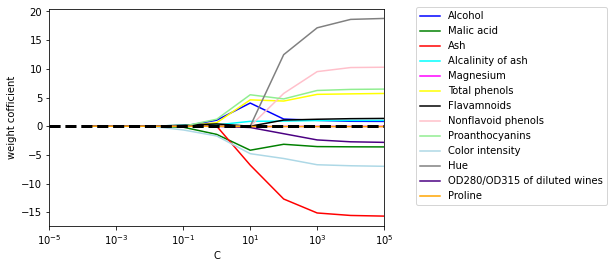

In [ ]:
import matplotlib.pyplot as plt
#描写の準備
fig = plt.figure()
ax = plt.subplot(111)
#各係数の色のリスト
colors = ['blue','green','red','cyan','magenta','yellow','black',
          'pink','lightgreen','lightblue','gray','indigo','orange']
#空のリストを作成（重み係数、逆正則化パラメータ）
weights,params = [],[]
#逆正則化パラメータの値ごとの処理
for c in np.arange(-4,6.):
  lr = LogisticRegression(penalty='l1',C=10.**c,solver='liblinear',
                          multi_class='ovr',random_state=0)
  lr.fit(X_train,y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

#重み係数をNumpy配列に変換
weights = np.array(weights)
#各重み係数をプロット
for column, color in zip(range(weights.shape[1]),colors):
  #横軸を逆正則化パラメータ、縦軸を重み係数として折れ線グラフ
  plt.plot(params,weights[:,column],label=df_wine.columns[column+1],
           color=color)
#y=0に黒い破線を引く
plt.axhline(0,color='black',linestyle='--',linewidth=3)
#横軸の範囲の設定
plt.xlim([10**(-5),10**5])
#軸ラベルの設定
plt.ylabel('weight cofficient')
plt.xlabel('C')
#横軸を対数スケールに設定
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

**4.5.4 逐次特徴量選択アルゴリズム**

貪欲探索アルゴリズムの一種

貪欲探索アルゴリズムとは、元々の「d次元」の特徴量空間を「k次元」の特徴量部分空間に削減するための手法である。

逐次後退選択（SBS）の目的は、元々の特徴量空間の次元を減らすことにあり、分類器の性能の低下を最小限に抑えたうえで計算効率を改善する。モデルが過学習の場合、SBSを適用することでモデルの予測性能を改善できることがある。SBSはsikit-learnではないが、実装は簡単

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  """
  逐次的選択(sequential backward selection)を実行するクラス
  """
  def __init__(self,estimator,k_features,scoring=accuracy_score,
               test_size=0.25,random_state=1):
    self.scoring = scoring #特徴量を評価する指標
    self.estimator = clone(estimator) #推定器
    self.k_features = k_features #選択する特徴量の個数
    self.test_size = test_size #テストデータの分割
    self.random_state = random_state #乱数シードを固定する random_state
  
  def fit(self,X,y):
    #訓練データとテストデータの分割
    X_train,X_test,y_train,y_test = train_test_split(
        X,y, test_size = self.test_size,random_state=self.random_state)
    #全ての特徴量の個数、列インデックス
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    #全ての特徴量を用いてスコアを算出
    score = self._calc_score(X_train,y_train,
                             X_test,y_test,self.indices_)
    self.scores_ = [score] #スコアを格納
    #特徴量が指定した個数になるまで処理を繰り返す
    while dim > self.k_features:
      scores = [] #空のスコアリストを作成
      subsets = [] #空の列インデックスリストを作成
      #特徴量の部分集合を表す列インデックスの組み合わせごとに処理を反復
      for p in combinations(self.indices_,r=dim -1):
        #スコアを算出して格納
          score = self._calc_score(X_train,y_train,X_test,y_test,p)
          subsets.append(score)
        #特徴量の部分集合を表す列インデックスのリストを格納
          subsets.append(p)
      
      #最良のスコアインデックスを抽出
      best = np.argmax(scores)
      #最良のスコアとなる列インデックスを抽出して格納
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      #特徴量の個数を一つだけ減らして次のステップへ
      dim -= 1
      #スコアを格納
      self.scores_.append(scores[best])
      #最後に格納したスコア
    self.k_score_ = self.scores_[-1]
    return self
  
  def transform(self,X):
    #抽出した特徴量を返す
    return X[:,self.indices_]
  
  def _calc_score(self,X_train,y_train,X_test,y_test,indices):
    #指定された列番号indicesの特徴量を抽出してモデルを適合
    self.estimator.fit(X_train[:,indices],y_train)
    #テストデータを用いてクラスラベルを予測
    y_pred = self.estimator.predict(X_test[:,indices])
    #真のクラスラベルと予測値を用いてスコアを算出
    score = self.scoring(y_test,y_pred)
    return score

SBSをKNN分類器を使って実装してみる

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#K最近傍法分類器のインスタンスを生成（近傍点数=5)
knn = KNeighborsClassifier(n_neighbors=5)
#逐次後退選択のインスタンスを生成（特徴量の個数が１になるまで特徴量を選択）
sbs = SBS(knn,k_features=1)
#逐次後退選択を実行
sbs.fit(X_train_std,y_train)

In [ ]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#K最近傍法分類器のインスタンスを生成（近傍点数=5)
knn = KNeighborsClassifier(n_neighbors=5)
#逐次後退選択のインスタンスを生成（特徴量の個数が１になるまで特徴量を選択）
sbs = SBS(knn,k_features=1)
#逐次後退選択を実行
sbs.fit(X_train_std,y_train)

SBSアルゴリズムが各段階で最良の特徴量の部分集合を用いた正解率を求めることを思い出そう。そこで、この実装の最も面白い部分である。KNN分類器の正解率の可視化に進むことにしよう

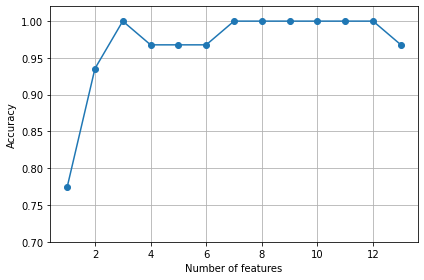

In [ ]:
#特徴量の個数のリスト（１３、１２、・・・１）
k_feat =[len(k) for k in sbs.subsets_]
#横軸の特徴量の個数、縦軸をスコアとした折れ線グラフのプロット
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

k3が100％なので中身を見てみる

In [ ]:
k3 =list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [ ]:
#13個全ての特徴量を用いてモデルを適合適合
knn.fit(X_train_std,y_train)
#訓練の正解率を出力
print('Training accuracy:', knn.score(X_train_std,y_train))

#テストの正解率を出力
print('Test accuracy:', knn.score(X_test_std,y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


新しいデータに対するモデルの汎化性能が上々である。

In [ ]:
#3つの特徴量を用いてモデルを適合
knn.fit(X_train_std[:,k3],y_train)
#訓練の正解率を出力
print('Traning accuracy:',knn.score(X_train_std[:,k3],y_train))
#テストの正解率を出力
print('Test accuracy:',knn.score(X_test_std[:,k3],y_test))

Traning accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


**4.6 ランダムフォレストで特徴量の重要度を評価する**

L１正則付きロジスティック回帰を使って無関係な特徴量を取り除く方法

特徴量選択のためのSBSアルゴリズムをKNN分類器に適用する方法

feature_importanceの引数を使えばランダムフォレストでも重要な特徴量をランク付けできる。

ランダムフォレストは正規化、標準化する必要はない。

 1) Proline                        0.185453
 2) Flavamnoids                    0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavoid phenols             0.013354
13) Ash                            0.013279


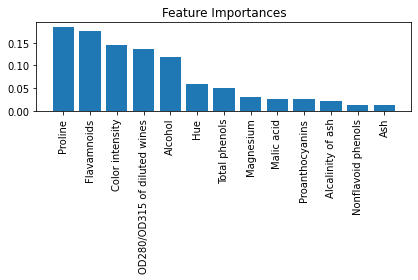

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]
#ランダムフォレストオブジェクトの作成（決定木の個数=500)
forest = RandomForestClassifier(n_estimators=500,random_state=1)
#モデルの適合
forest.fit(X_train,y_train)
#特徴量の重要度を抽出
importances = forest.feature_importances_
#重要度を降順で特徴量のインデックスを抽出
indices = np.argsort(importances)[::-1]
#重要度の降順で特徴量の名称、重要度を表示
for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" %
        (f + 1, 30, feat_labels[indices[f]],importances[indices[f]]))

#ワインデータセットの特徴量を相対的な重要度でランク付けしたグラフの作成
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

124

In [ ]:
from sklearn.feature_selection import SelectFromModel
#特徴量選択オブジェクトを生成（重要度の閾値を0.1に設定）
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)
#特徴量を抽出
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:',
      X_selected.shape[1])

for f in range(X_selected.shape[1]):
  print("%2d) %-*s %f" % (f +1,30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavamnoids                    0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


Number of features that meet this threshold criterion: 5
 1) Proline                        0.185453
 2) Flavamnoids                    0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
